In [36]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn
from sklearn.preprocessing import LabelEncoder# Импортируем LabelEncoder от scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

Набор данных представляет собой данные о продаже автомобилей в России по регионам.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

Также среди параметров есть целевой для задачи классификации - тип топлива.




Загружаем наши данные из файла

In [12]:
DF = pd.read_csv('/content/all_regions.csv', engine='python')
DF

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Volkswagen,Golf,Хэтчбек 5 дв.,Серебристый,Бензин,NaN,240000.0,Механика,101.0,280000,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/volkswagen/golf/5001300...,101 л.с. люк не течёт. Документы в порядке. Со...,2023-05-02 01:00:00
1,Лада,1111 Ока,Хэтчбек 3 дв.,Фиолетовый,Бензин,1996.0,37000.0,Механика,33.0,95000,0.6 MT 11113,ВАЗ-11113,0.7 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/oka/50378140.html,"Ваз Ока Год: 2003 Цвет: Баклажан, в ПТС так и ...",2023-05-02 20:00:00
2,Toyota,Funcargo,Хэтчбек 5 дв.,Серебристый,Бензин,2002.0,295000.0,АКПП,87.0,380000,1.3 J,2NZ-FE,1.3 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/toyota/funcargo/5037751...,ХОРОШЕЕ СОСТОЯНИЕ. замена комплекта грм и помп...,2023-05-02 20:00:00
3,Лада,Гранта,Лифтбек,Серый,Бензин,2018.0,16000.0,Механика,106.0,795000,1.6 MT Comfort,ВАЗ-21127,1.6 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50382492.html,"Автомобиль в отличном техническом состоянии, н...",2023-05-02 23:00:00
4,Лада,Нива Легенд,Джип 3 дв.,Зеленый,Бензин,NaN,NaN,Механика,83.0,1022900,NaN,NaN,NaN,2023-04-02 00:00:00,Яблоновский,https://yablonovskiy.drom.ru/lada/niva_legend/...,Модель: Нива Легенд Комплектация: LADA (ВАЗ) N...,2023-05-02 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,Toyota,Prius Alpha,Минивэн,Серебристый,Бензин,2011.0,136000.0,Вариатор,99.0,1130000,1.8 S Touring selection 5 seater,2ZR-FXE,1.8 LTR,2023-05-06 00:00:00,Чита,https://chita.drom.ru/toyota/prius_a/50214242....,.В Продаже Prius Alpha S touring selection 13 ...,2023-05-06 19:00:00
9456,Toyota,C-HR,Джип 5 дв.,Бордовый,Бензин,2018.0,70000.0,Вариатор,98.0,1920000,Hybrid 1.8 G,2ZR-FXE,1.8 LTR,2023-05-06 00:00:00,Чита,https://chita.drom.ru/toyota/c-hr/49475735.html,". Б/П, 2019 год. ВОЗМОЖНО ПРИОБРЕТЕНИЕ ЧЕРЕЗ А...",2023-05-06 19:00:00
9457,Toyota,Corolla Fielder,Универсал,Белый,Бензин,2002.0,200000.0,АКПП,109.0,505000,1.5 X,1NZ-FE,1.5 LTR,2023-05-06 00:00:00,Чита,https://chita.drom.ru/toyota/corolla_fielder/5...,Крепкий надёжный Филдер. Достойное техническое...,2023-05-06 19:00:00
9458,Lexus,RX350,Джип 5 дв.,Черный,Бензин,2009.0,177000.0,АКПП,277.0,2099000,3.5 AT Premium+,2GR-FE,3.5 LTR,2023-05-06 00:00:00,Чита,https://chita.drom.ru/lexus/rx350/50727182.html,"Максимальная комплектация. Люк, проекция на ст...",2023-05-06 19:00:00


In [13]:
DF.columns

Index(['brand', 'name', 'bodyType', 'color', 'fuelType', 'year', 'mileage',
       'transmission', 'power', 'price', 'vehicleConfiguration', 'engineName',
       'engineDisplacement', 'date', 'location', 'link', 'description',
       'parse_date'],
      dtype='object')

**Предварительная обработка данных**

выберем нужные колонки

In [68]:
df_new = DF[['brand', 'name', 'bodyType', 'fuelType', 'transmission', 'power', 'year', 'mileage', 'price']]
df_new

,brand,name,bodyType,fuelType,transmission,power,year,mileage,price
0,Volkswagen,Golf,Хэтчбек 5 дв.,Бензин,Механика,101.0,NaN,240000.0,280000
1,Лада,1111 Ока,Хэтчбек 3 дв.,Бензин,Механика,33.0,1996.0,37000.0,95000
2,Toyota,Funcargo,Хэтчбек 5 дв.,Бензин,АКПП,87.0,2002.0,295000.0,380000
3,Лада,Гранта,Лифтбек,Бензин,Механика,106.0,2018.0,16000.0,795000
4,Лада,Нива Легенд,Джип 3 дв.,Бензин,Механика,83.0,NaN,NaN,1022900
...,...,...,...,...,...,...,...,...,...
9455,Toyota,Prius Alpha,Минивэн,Бензин,Вариатор,99.0,2011.0,136000.0,1130000
9456,Toyota,C-HR,Джип 5 дв.,Бензин,Вариатор,98.0,2018.0,70000.0,1920000
9457,Toyota,Corolla Fielder,Универсал,Бензин,АКПП,109.0,2002.0,200000.0,505000
9458,Lexus,RX350,Джип 5 дв.,Бензин,АКПП,277.0,2009.0,177000.0,2099000


Список числовых и категориальных данных

In [69]:
cat_columns = []
num_columns = []

for column_name in df_new.columns:
    if (df_new[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  ['brand', 'name', 'bodyType', 'fuelType', 'transmission'] 
 len =  5
numerical columns:	  ['power', 'year', 'mileage', 'price'] 
 len =  4


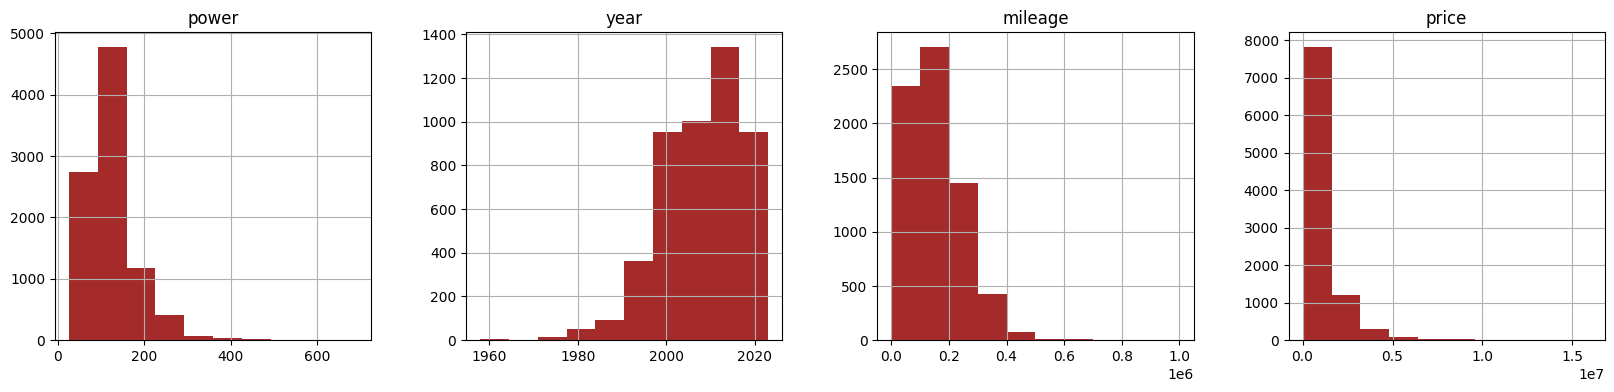

In [70]:
fig, axs = plt.subplots(1,4,figsize=(20,  4))
df_new.hist(column = num_columns, ax = axs, color='brown');

Посмотрим сколько незаполненных значений

In [71]:
df_new.isnull().sum()

brand              0
name               0
bodyType           0
fuelType          27
transmission      29
power            226
year            4691
mileage         2434
price              0
dtype: int64

Видим, что не заполненно много значений в колонке year,mileage и power. Заполним их средними значениями

In [72]:
df_new['year'].fillna(df_new['year'].mean(), inplace = True)
df_new['mileage'].fillna(df_new['mileage'].mean(), inplace = True)
df_new['power'].fillna(df_new['power'].mean(), inplace = True)


In [73]:
df_new['fuelType'].value_counts()

Бензин     8746
Дизель      652
Электро      35
Name: fuelType, dtype: int64

видим, что самый популярный вид топлива - это бензин. Заполним недостающие значения "Бензин" и не будем брать в расчет электро автомобили

In [75]:
df_new['fuelType'].replace(np.nan, 'Бензин', inplace = True)
df_new = df_new.loc[df_new['fuelType'] != "Электро"]
df_new = df_new.reset_index(drop=True)
df_new['fuelType'].value_counts()

Бензин    8773
Дизель     652
Name: fuelType, dtype: int64

In [76]:
df_new['transmission'].value_counts()

Механика    3359
АКПП        3010
Вариатор    2301
Робот        436
Автомат      290
Name: transmission, dtype: int64

видим что нет преобладающих значений, а незаполненных полей мало. Думаю, что можно просто удалить незаполненные

In [77]:
df_new = df_new.dropna(subset=['transmission'])
df_new = df_new.reset_index(drop=True)

In [78]:
df_new.isnull().sum()

brand           0
name            0
bodyType        0
fuelType        0
transmission    0
power           0
year            0
mileage         0
price           0
dtype: int64

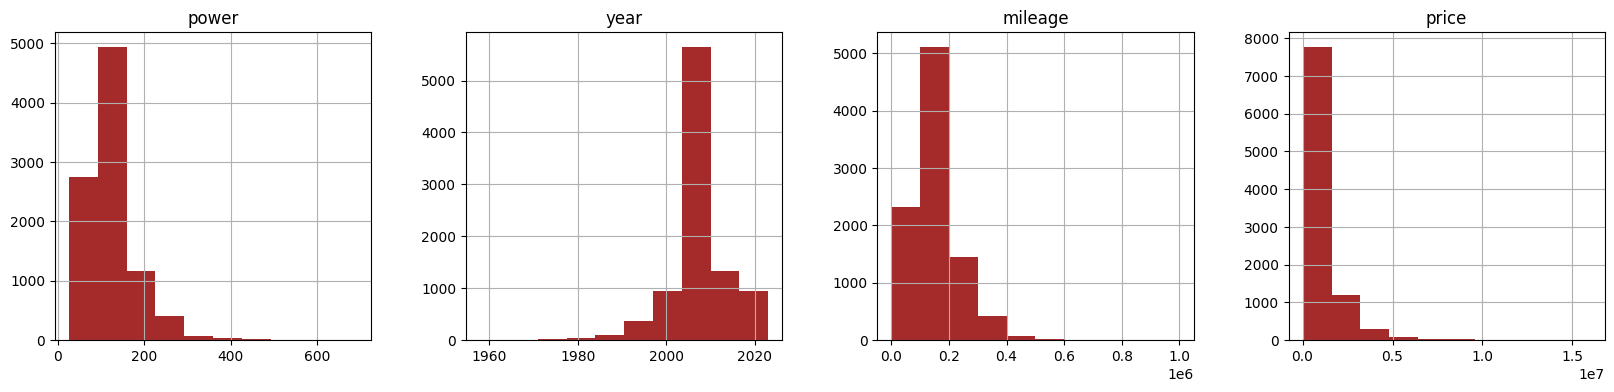

In [79]:
fig, axs = plt.subplots(1,4,figsize=(20,  4))

df_new.hist(column = num_columns, ax = axs, color='brown');

fuelType убираем из обработки, поскольку она является целевой меткой и будет обработана отдельно

Остальные колонки лучше нелинейно преобразовывать

**PipeLine**

In [80]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

In [81]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

In [82]:
num_pipe_year_mileage = Pipeline([
    ('power', PowerTransformer())
])

num_pipe = ['year','power','mileage']

cat_pipe_style_fuel = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])

num_pipe_price = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01, )),
    ('power', PowerTransformer())
])

num_price = ['price']

cat_style_fuel = ['bodyType']

cat_pipe_brand = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.001, other_value='Other')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

cat_brand = ['brand']

cat_pipe_name = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.0001, other_value='Other')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

cat_name = ['name']

# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num_pipe', num_pipe_year_mileage, num_pipe),
    ('num_price', num_pipe_price, num_price)
])

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=[
    ('num_pipe', num_pipe_year_mileage, num_pipe),
    ('cat_style_fuel', cat_pipe_style_fuel, cat_style_fuel),
    ('cat_brand', cat_pipe_brand, cat_brand),
    ('cat_name', cat_pipe_name, cat_name),
])

In [83]:
# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns_num = np.hstack([num_pipe,
                        num_price ])

**Логистическая регрессия**

In [84]:
from sklearn.linear_model import LogisticRegression # Логистичекая регрессия от scikit-learn

from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn

from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import f1_score # f1-мера от Scikit-learn
from sklearn.metrics import classification_report # функция scikit-learn которая считает много метрик классификации

**Считываем данные, разбиваем на тестовую и тренировочную**

In [85]:
# не забываем удалить целевую переменную "мощность двигателя" из признаков
X,y = df_new.drop(columns = ['fuelType']), df_new['fuelType']

**Приводим целевые метки к 0 и 1**

In [86]:
Label = LabelEncoder()
Label.fit(y) # задаем столбец, который хотим преобразовать
Label.classes_ # в аттрибуте .classes_ хранится информация "какой класс как шифруется"

array(['Бензин', 'Дизель'], dtype=object)

Бензин - 0,
Дизель - 1

In [87]:
target = Label.transform(y) # преобразуем и сохраняем в новую переменную
target

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
# разбиваем на тренировочную и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, target,
                                                    test_size=0.3,
                                                    random_state=42)
X_train

,brand,name,bodyType,transmission,power,year,mileage,price
1412,Honda,Freed,Минивэн,Вариатор,118.0,2007.94653,169000.000000,980000
6851,BMW,X6,Джип 5 дв.,АКПП,400.0,2020.00000,48000.000000,9444444
3455,Лада,Гранта,Седан,Механика,90.0,2022.00000,157764.873328,786900
1722,Opel,Meriva,Минивэн,АКПП,120.0,2007.94653,43000.000000,930000
5840,Daihatsu,Mira,Хэтчбек 5 дв.,АКПП,58.0,2007.94653,250000.000000,265000
...,...,...,...,...,...,...,...,...
5734,Mitsubishi,Outlander,Джип 5 дв.,Вариатор,146.0,2007.94653,142000.000000,1395000
5191,Toyota,Prius,Лифтбек,Вариатор,76.0,2008.00000,1000.000000,720000
5390,Toyota,Succeed,Универсал,АКПП,109.0,2012.00000,1000.000000,698000
860,EXEED,TXL,Джип 5 дв.,Робот,186.0,2021.00000,157764.873328,4249900


**Оценим модель с использованием только числовых данных**

Преобразуем данные

In [89]:
# Сначала обучаем на тренировочных данных
X_train_prep = preprocessors_num.fit_transform(X_train)
# потом на валидационной
X_val_prep = preprocessors_num.transform(X_val)

Обучаем модель

In [90]:
model = LogisticRegression(random_state = 42)

model.fit(X_train_prep, y_train);

**Подготовим несколько функций для анализа обученной модели**

вытаскивание коэффициентов из модели

In [91]:
def get_coefs (model):
    """Берем веса как атрибуты обученной модели.
    Входные переменные:
    ===========
    model: обученная модель
    """
    B0=model.intercept_[0]
    B=model.coef_[0]
    return B0, B

написание модели

In [92]:
def print_model (B0,B,features_names):
    """Написание уравнения модели.
    Входные переменные:
    ===========
    B0: смещение (независимый коэффициент)
    weights: веса признаков
    features_names: список названий признаков
    """
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

визуализации весов в виде столбчатых диаграмм

In [93]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    """Отрисовка весов.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    """
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers] # создаем "названия" весов
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

Напишем уравнение модели

In [94]:
B0, B = get_coefs(model)
features_names = list(columns_num)
print_model(B0,B,features_names)

Решение
-3.148-0.70*year+0.40*power+0.25*mileage+0.99*price


Визуализируем веса в виде столбчатых диаграмм

In [95]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Оценка метрик

In [96]:
def calculate_metric(model_pipe, X, y, metric = f1_score):
    """Расчет метрики.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    metric: метрика (f1 - по умолчанию)
    """
    y_model = model_pipe.predict(X)
    return metric(y, y_model)

print(f"f1 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

f1 на тренировочной выборке: 0.0173
f1 на валидационной выборке: 0.0000


In [97]:
print(classification_report(y_val, model.predict(X_val_prep), target_names=Label.classes_))

              precision    recall  f1-score   support

      Бензин       0.92      1.00      0.96      2604
      Дизель       0.00      0.00      0.00       215

    accuracy                           0.92      2819
   macro avg       0.46      0.50      0.48      2819
weighted avg       0.85      0.92      0.89      2819



Кросс-валидация

In [98]:
def cross_validation (X, y, model, scoring, cv_rule):
    """Расчет метрик на кросс-валидации.
    Параметры:
    ===========
    model: модель или pipeline
    X: признаки
    y: истинные значения
    scoring: словарь метрик
    cv_rule: правило кросс-валидации
    """
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [99]:
scoring_clf = {'ACC': 'accuracy',
           'F1': 'f1',
           'Precision': 'precision',
           'Recall': 'recall'}

In [100]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.020629,0.019279,0.928571,0.040816,0.181818,0.022989
1,0.019696,0.020694,0.931611,0.021739,0.250000,0.011364
2,0.026597,0.013141,0.929278,0.000000,0.000000,0.000000
3,0.021428,0.010526,0.932319,0.021978,0.250000,0.011494
4,0.012132,0.007982,0.933080,0.022222,0.333333,0.011494




test_ACC          0.930972
test_F1           0.021351
test_Precision    0.203030
test_Recall       0.011468
dtype: float64


Небольшие выводы по модели:

используя только 4 числовых признака можно достаточно хорошо предсказывать тип топлива

модель выглядит "логично": с ростом мощности двигателя, пробега и цены "увеличивается" вероятность того что автомобиль имеет бензиновый двигатель, а с ростом года - вероятность того что автомобиль имеет дизельный двигатель

**Объединяем Pipeline Предобработки и Модель**

In [102]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', LogisticRegression(random_state = 42))
])
pipe_num['preprocessors']

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['year', 'power', 'mileage']),
                                ('num_price',
                                 Pipeline(steps=[('QuantReplace',
                                                  QuantileReplacer(threshold=0.01)),
                                                 ('power',
                                                  PowerTransformer())]),
                                 ['price'])])

In [103]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['year', 'power', 'mileage']),
                                                 ('num_price',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('power',
                                                                   PowerTransformer())]),
                                                  ['price'])])),
                ('model', LogisticRegression(random_state=42))])

In [104]:
B0, B = get_coefs(pipe_num['model'])
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
-3.148-0.70*year+0.40*power+0.25*mileage+0.99*price


In [105]:
print(f"f1 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

f1 на тренировочной выборке: 0.0173
f1 на валидационной выборке: 0.0000


In [106]:
print(classification_report(y_val, pipe_num.predict(X_val), target_names=Label.classes_))

              precision    recall  f1-score   support

      Бензин       0.92      1.00      0.96      2604
      Дизель       0.00      0.00      0.00       215

    accuracy                           0.92      2819
   macro avg       0.46      0.50      0.48      2819
weighted avg       0.85      0.92      0.89      2819



In [107]:
cross_validation (X_train, y_train,
                  pipe_num,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.082820,0.037392,0.928571,0.040816,0.181818,0.022989
1,0.145523,0.041153,0.931611,0.021739,0.250000,0.011364
2,0.021590,0.000000,NaN,NaN,NaN,NaN
3,0.106747,0.041040,0.932319,0.021978,0.250000,0.011494
4,0.140629,0.045482,0.933080,0.022222,0.333333,0.011494




test_ACC          0.931395
test_F1           0.026689
test_Precision    0.253788
test_Recall       0.014335
dtype: float64


**Оценим влияние категориальных признаков**

In [109]:
pipe_all = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', LogisticRegression(random_state = 42))
    ])
pipe_all.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['year', 'power', 'mileage']),
                                                 ('cat_style_fuel',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['bodyType']),
                                                 ('cat_brand',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.001)),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['brand']),
                                                 ('cat_name',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.0001)),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['name'])])),
                ('model', LogisticRegression(random_state=42))])

In [112]:
cat_style_fuel_names = pipe_all['preprocessors'].transformers_[1][1]['encoder'].get_feature_names_out(cat_style_fuel)
cat_brand_names =  pipe_all['preprocessors'].transformers_[2][1]['encoder'].get_feature_names_out(cat_brand)
cat_name_names =  pipe_all['preprocessors'].transformers_[3][1]['encoder'].get_feature_names_out(cat_name)

# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_pipe,
                    cat_style_fuel_names,
                    cat_brand_names,
                    cat_name_names])

In [115]:
B0, B = get_coefs(pipe_all['model'])
features_names = list(columns)

print_model (B0,B,features_names)

Решение
-3.270-0.21*year-0.25*power+0.15*mileage+0.50*bodyType_Джип 3 дв.+0.75*bodyType_Джип 5 дв.-1.13*bodyType_Купе-1.62*bodyType_Лифтбек+1.91*bodyType_Минивэн-0.01*bodyType_Открытый+3.58*bodyType_Пикап-1.42*bodyType_Седан-0.38*bodyType_Универсал-0.49*bodyType_Хэтчбек 3 дв.-1.69*bodyType_Хэтчбек 5 дв.+0.78*brand_Audi+2.63*brand_BMW-0.64*brand_Chery-0.16*brand_Chevrolet-0.04*brand_Citroen-0.22*brand_Daewoo-0.31*brand_Daihatsu-0.07*brand_Datsun-0.52*brand_Dodge-0.93*brand_EXEED-0.66*brand_Fiat+0.56*brand_Ford-0.73*brand_Geely+0.22*brand_Great Wall-0.24*brand_Haval-2.50*brand_Honda+1.94*brand_Hyundai-0.47*brand_Infiniti+0.83*brand_Kia+1.90*brand_Land Rover-1.08*brand_Lexus-0.21*brand_Lifan+0.50*brand_Mazda+2.58*brand_Mercedes-Benz+0.16*brand_Mitsubishi+0.26*brand_Nissan-0.73*brand_OMODA+0.44*brand_Opel+0.72*brand_Other+1.29*brand_Peugeot+0.91*brand_Renault-0.62*brand_Skoda+1.75*brand_SsangYong-0.83*brand_Subaru-1.08*brand_Suzuki-0.15*brand_Toyota+1.20*brand_Volkswagen-0.19*brand_Volvo-0

**Модификация функции для отрисовки весов**

In [118]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    """Отрисовка весов с фильтром.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    threshold: порог "значимости" коэффициентов
    """
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # Рисуем столбчатую диаграмму
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [119]:
Bs = np.hstack([B0,B])
vis_weigths_threshold(Bs,columns, 1,  width = 1600)

In [120]:
print(f"f1 на тренировочной выборке: {calculate_metric(pipe_all, X_train, y_train):.4f}")
print(f"f1 на валидационной выборке: {calculate_metric(pipe_all, X_val, y_val):.4f}")

f1 на тренировочной выборке: 0.7265
f1 на валидационной выборке: 0.6723


In [121]:
print(classification_report(y_val, pipe_all.predict(X_val), target_names=Label.classes_))

              precision    recall  f1-score   support

      Бензин       0.96      0.99      0.98      2604
      Дизель       0.85      0.56      0.67       215

    accuracy                           0.96      2819
   macro avg       0.90      0.77      0.83      2819
weighted avg       0.96      0.96      0.95      2819



In [122]:
cross_validation (X_train, y_train,
                  pipe_all,
                  scoring_clf,
                  StratifiedKFold(n_splits=5, shuffle= True, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_ACC,test_F1,test_Precision,test_Recall
0,0.701656,0.081957,0.965805,0.685315,0.875000,0.563218
1,0.774335,0.078467,0.959726,0.582677,0.948718,0.420455
2,0.033654,0.000000,NaN,NaN,NaN,NaN
3,0.946004,0.076277,0.959696,0.613139,0.840000,0.482759
4,1.067883,0.092245,0.968061,0.695652,0.941176,0.551724




test_ACC          0.963322
test_F1           0.644196
test_Precision    0.901224
test_Recall       0.504539
dtype: float64


Небольшие выводы по модели:

добавление категориальных признаков улучшает результаты модели (метрика accuracy на кроссвалидации 0.96 против 0.93)

добавляется интерпретация некоторых категориальных признаков: некоторые категории усиливают вероятность того, что автомобиль - с ДВС, а другие - с дизельным двигателем

**Сохранение модели**

In [123]:
from joblib import dump, load

In [124]:
dump(model, 'model.joblib')  # чтобы сохранить объект
dump(pipe_num, 'pipe_num.joblib')  # чтобы сохранить объект
dump(pipe_all, 'pipe_all.joblib')  # чтобы сохранить объект

['pipe_all.joblib']

In [125]:
pipe_load = load('pipe_all.joblib')